In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import os as os
import seaborn as sns
import numpy as np
import warnings 

warnings.filterwarnings("ignore") 


In [4]:
#read csv file data 
data=pd.read_csv('C:/Users/Shiva/Downloads/haberman.csv')

In [5]:
#Returns the first 5 rows of the dataframe
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


<h6>The dataset has four(4) labes which are:</h6>

<h6>Age</h6> which describes age of the patient when the operation was performed.

<h6>Year</h6> which describes the year in which the patient had the operation.

<h6>Nodes</h6> which describe the number of axiliary nodes which the patient had at the time of operation.

<h6>Status</h6> which describes whether tha patient has lived past 5 years post opernation where '1' being alive and '2' being passed away.

<h2>Check the null values</h2>

In [6]:
data.isnull().values.any()

False

<h2>Shape of Data</h2>

In [13]:
data.shape

(306, 4)

<h2>Value count of unique class</h2>


In [8]:
data.status.value_counts()

1    225
2     81
Name: status, dtype: int64

In [14]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<h2>Observation</h2>

<p>we observe that we have 306 rosw and 4 columns</p>
<p>there is not any null value</p> 
<p>data imbalance</p>
<p>The important thing to be noted is that the 75% of the patients have nodes <=4</p>
<p>The age of the patients are from 30 to 83.</p>
<p>75% of the patients have age <=60</p>

<h2>Pair Plot</h2>

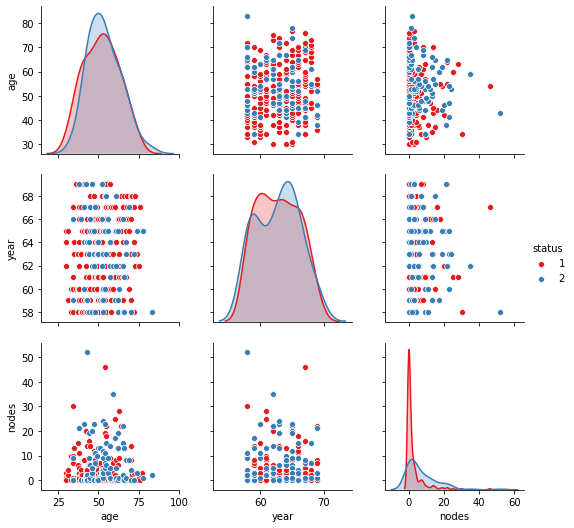

In [11]:
sns.pairplot(data,hue='status',palette='Set1',vars=["age", "year", "nodes"],size=2.5)
plt.show()

<h2>Observation</h2>
Pair plots which visualize how the attributes vary with respect to each other.

The scatter plot between nodes vs age shows that most of the patients who survived have less than 10 nodes.

It can also be observed from the nodes vs year plot that most the patients from the year 65 haven't lived past 5 years.

<h1>Univariate Analysis</h1>

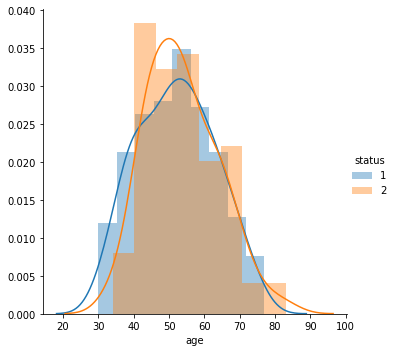

In [12]:
#
sns.FacetGrid(data,hue='status',size=5)\
   .map(sns.distplot,'age')\
   .add_legend()
plt.show()

The age of patients lies between the range of 30 to 83

It has been observed that patients between the ages 40 and 60 have a lesser survival rate than the rest.

While the patients between 30 and 55 have an improved survial percentage

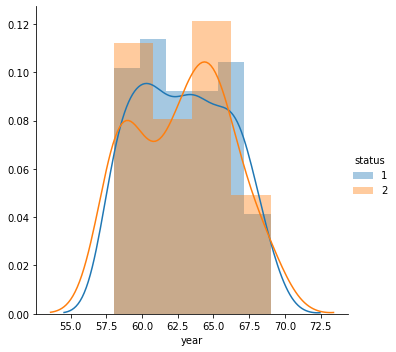

In [30]:
sns.FacetGrid(data,hue='status',size=5)\
.map(sns.distplot,'year')\
.add_legend()
plt.show()

there is no much information to extract from <b>year</b> feature

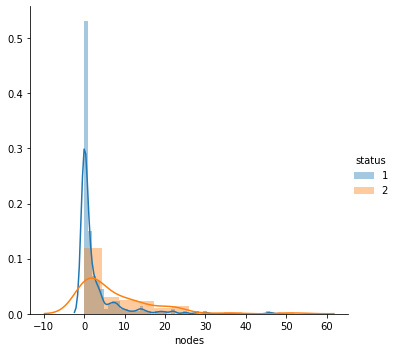

In [32]:
sns.FacetGrid(data,hue='status',size=5)\
.map(sns.distplot,'nodes')\
.add_legend()
plt.show()


<p>patient who have lesser number of nodes have higher chance of survival. who have node<=2 </p>

In [15]:
#haberman_1 defines class_1 elements 
data_1=data[data['status']==1]
#haberman_2 defines class_2 elements
data_2=data[data['status']==2]

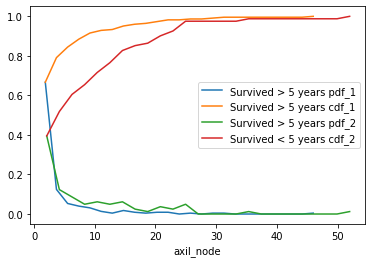

In [37]:
count_1, bin_edges_1=np.histogram(data_1['nodes'],bins=25,density=True)
count_2,bin_edges_2=np.histogram(data_2['nodes'],bins=25,density=True)
pdf_1=count_1/sum(count_1)
pdf_2=count_2/sum(count_2)
cdf_1=np.cumsum(pdf_1)
cdf_2=np.cumsum(pdf_2)
plt.plot(bin_edges_1[1:],pdf_1)
plt.plot(bin_edges_1[1:],cdf_1)
plt.plot(bin_edges_2[1:],pdf_2)
plt.plot(bin_edges_2[1:],cdf_2)
plt.legend(["Survived > 5 years pdf_1", "Survived > 5 years cdf_1", 
            "Survived > 5 years pdf_2", "Survived < 5 years cdf_2" ])
plt.xlabel('axil_node')
plt.show()




<br>If axil_node <47 then patient is survived</br>
<br>If axil_node >47 then patient is not survived</br>

<h2>Box Plot</h2>

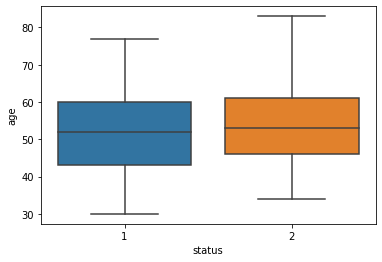

In [38]:

sns.boxplot(data=data,x='status',y='age')
plt.show()

We can observe that 75% of people who survived have their age <=60 While about 75% of people who died have their ages >=45

sns.boxplot(data=data,x='status',y='year')
plt.show()

<h2>Violin Plot</h2>

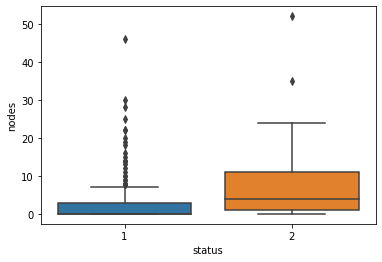

In [40]:

sns.boxplot(data=data,x='status',y='nodes')
plt.show()

We can observe that 25% of the people who survived have nodes <=1 and 75% of people have nodes <=5.

We can also observe that 50% pf the people who died have nodes >=5.

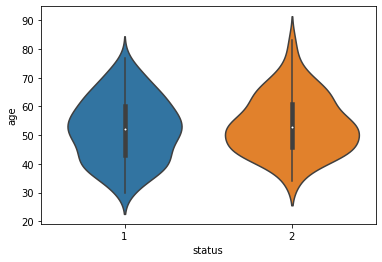

In [42]:
sns.violinplot(data=data,x='status',y='age')
plt.show()

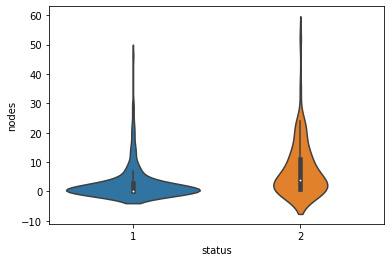

In [44]:
sns.violinplot(data=data,x='status',y='nodes')
plt.show()


By observation we can identify that people with lesser number of nodes have survived more than people with more number of nodes.

<h2>Summary</h2>
1-The average age of the patients who underwent the operation is around 50.

2-Patients who underwent operation have ages between 30 and 80.

3-we observed that 73% of the people who underwent the operation survived past 5 years.

4-It has been obatained that 26% of the people who underwent the operation did not live past 5 years

5-75% of the patients have their age below 60.

6-It has been observed that people below the age <=50 tend to have survived than people above the age of >50.

7-Hence we can assume that 'age' affect the patients percentage of surival.

8-It has been observed that a lot of the patients have nodes less than 1

9-Patients who have nodes more than >=2 tend to have died more than peo.

10-From the data we have observed that 64% of people have <=1 node.

11-People with nodes 0 or <=1 tend to have survived more post operation for longer than 5 years.

12-Hence we can assume that the number of 'nodes' affect the percentage of survival of a patient.

13-We have observed that when people who have youger age, even with higher number of nodes there is a chance of survival

14-however as age increases, people with more nodes during older age tend to have died.

<h3>Important Features</h3>

Number of nodes is important as we have observed that people with less number of nodes have survived past 5 years post 

operation than people with more number of nodes.

Age isn't impactful, however it has been observed that younger patients with more nodes have survived past 5 years and

hence should duly be noted.